In [5]:
from clouds_classification import CloudsClassifier

In [6]:
train_dit = "dataset/train"
valid_dir = "dataset/valid"
img_height = 200
img_width = 200
batch_size = 32

classifier = CloudsClassifier(
    train_dir=train_dit,
    valid_dir=valid_dir,
    img_height=img_height,
    img_width=img_width,
    batch_size=batch_size,
)

Création du dataset d'entraînement...
Chargement des données depuis : dataset/train
Chargement depuis 'dataset/train': 1502 images trouvées pour les classes ['altocumulus', 'altostratus', 'cirrocumulus', 'cirrostratus', 'cirrus', 'cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus'].

Création du dataset de validation...
Chargement des données depuis : dataset/valid
Chargement depuis 'dataset/valid': 145 images trouvées pour les classes ['altocumulus', 'altostratus', 'cirrocumulus', 'cirrostratus', 'cirrus', 'cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus'].

Les datasets sont prêts.


In [17]:
model_name = "ResNet50V2"
# model_name = "VGG16"

classifier.build_model(base_model_name=model_name)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Modèle construit avec ResNet50V2 comme base.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_2 (RandomFlip)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 200, 200, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_2 (TrueDivide)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_2 (Subtract)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,585,290 (89.97 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [18]:
classifier.train(epochs=50, fine_tune_epochs=30, save_path=model_name)


--- Phase 1: Entraînement de la tête de classification ---
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 777ms/step - accuracy: 0.2152 - loss: 2.3137 - val_accuracy: 0.5517 - val_loss: 1.4769
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 796ms/step - accuracy: 0.5117 - loss: 1.4517 - val_accuracy: 0.6069 - val_loss: 1.2618
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6068 - loss: 1.1682 - val_accuracy: 0.6414 - val_loss: 1.1372
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.6374 - loss: 1.0321 - val_accuracy: 0.6552 - val_loss: 1.0891
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6735 - loss: 0.9703 - val_accuracy: 0.6966 - val_loss: 1.0327
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7346 - loss: 0.8309 - val_accuracy: 0.6897 - val_loss: 1.0451
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7476 - loss: 0.8080 - val_accuracy: 0.6759 - val_loss: 1.0084
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - 

In [19]:
classifier.load_model(model_name + ".keras")

Modèle chargé avec succès depuis ResNet50V2.keras


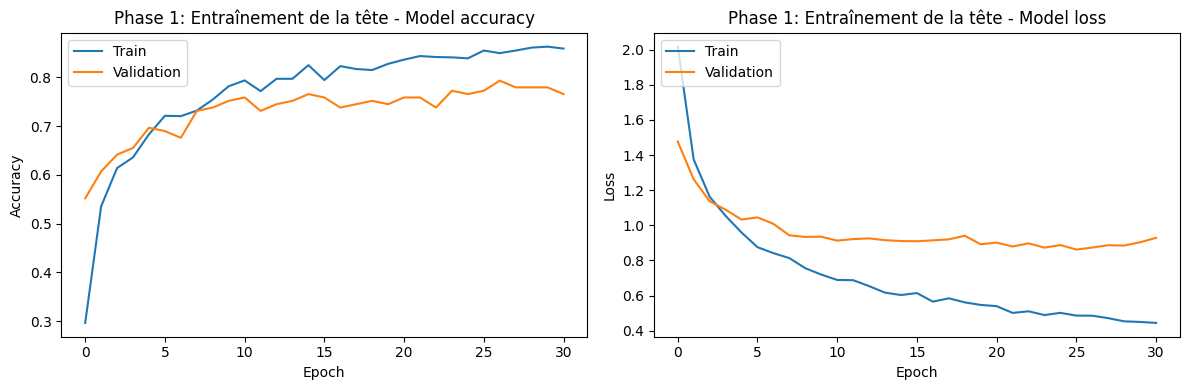

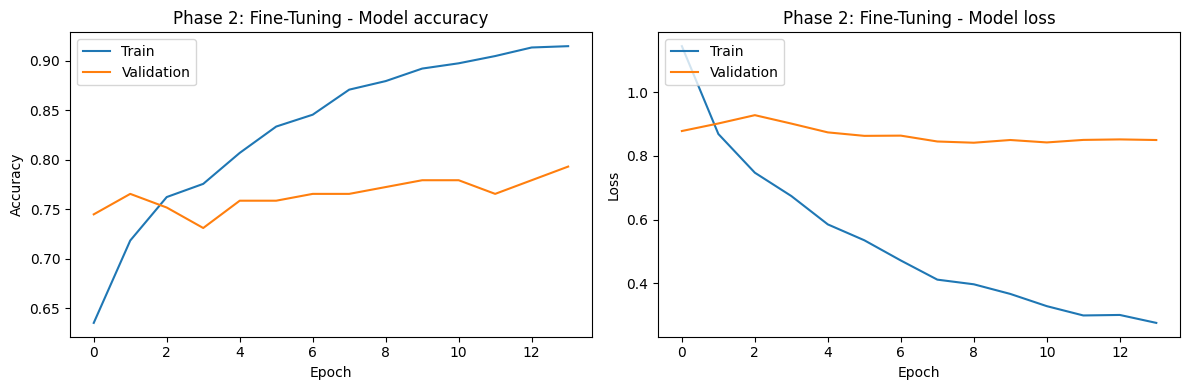

In [20]:
classifier.plot_history()

In [16]:
img_path = "dataset/test/Ac-N053-33-_jpg.rf.6b6f2ae38015d73a335d80b7e5cb8f5d.jpg"
img_path = "dataset/test/27949466-091d-47c0-b206-5920d2133e41_jpg.rf.4189ec0e892ac4ceb9be2e1eb04f8e3b.jpg"


predicted_class_name, confidence = classifier.predict(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
La classe prédite est: stratocumulus avec une confiance de 86.65%


In [ ]:
img_path = "dataset/test/Ac-N053-33-_jpg.rf.6b6f2ae38015d73a335d80b7e5cb8f5d.jpg"
img_path = "dataset/test/Ac-N053-70-_jpg.rf.2adc49fa80c477ad0856f867aa55d99c.jpg"

predicted_class_name, confidence = classifier.predict(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
La classe prédite est: altocumulus avec une confiance de 88.02%


In [33]:
import pandas as pd
import os 

class_test = pd.read_csv("dataset/test/_classes.csv", sep=",")

good_answer = 0
wrong_answer = 0
for img_path in class_test["filename"]:
    row = class_test[class_test["filename"] == img_path].iloc[0]
    # Trouver le nom de la colonne où la valeur est 1
    true_class_name = row[row == 1].index[0]
    predicted_class_name, confidence = classifier.predict(os.path.join(f"dataset/test/{img_path}"))

    if true_class_name == predicted_class_name:
        good_answer +=1
    else:
        wrong_answer +=1

print(f"Bonnes réponses : {good_answer} sur {good_answer + wrong_answer}")
print(f"Mauvaises réponses : {wrong_answer} sur {good_answer + wrong_answer}")

    # print("True : ", true_class_name, "Predicted : ", predicted_class_name, "Confidence : ", confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
La classe prédite est: altocumulus avec une confiance de 88.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La classe prédite est: stratus avec une confiance de 96.20%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La classe prédite est: cirrostratus avec une confiance de 41.10%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La classe prédite est: stratocumulus avec une confiance de 51.89%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La classe prédite est: altostratus avec une confiance de 54.20%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
La classe prédite est: cirrus avec une confiance de 99.98%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
La classe prédite est: cumulonimbus avec une confiance de 99.76%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
La classe prédite est: cumulonimbus avec une confiance de 99.87%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La classe prédite est: stratus avec une confiance de 69.16%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
La classe prédite est: nimbostratus avec une confian